# CZĘŚĆ 2. PROJEKTU ZALICZENIOWEGO

## Sekcja 0: Setup

imports

In [2]:

!pip install pandas
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [53]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## Sekcja 1. Wczytywanie wcześniej zdobytych danych

In [40]:
df = pd.read_csv('offers.csv') 
df

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
0,Analyst/Architect IBM BAW,18 000,26 000,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,True,True,https://justjoin.it/job-offer/tuatara-analyst-...
1,Data Scientist (Fraud),10 791,12 666,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,https://justjoin.it/job-offer/auctane-poland-d...
2,Remote Senior Cloud Engineer (DevSecOps),22 000,31 000,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,False,True,https://justjoin.it/job-offer/kingfisher-plc-r...
3,Remote Mid Data Engineer,15 000,19 000,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,False,True,https://justjoin.it/job-offer/kingfisher-plc-r...
4,Customer Support Lead,8 000,8 500,PLN,Funtico,Warszawa,Customer Support,Communication,English,False,False,https://justjoin.it/job-offer/funtico-customer...
...,...,...,...,...,...,...,...,...,...,...,...,...
1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,https://justjoin.it/job-offer/data-force-group...
1779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,https://justjoin.it/job-offer/calimala-ai-gena...
1780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,https://justjoin.it/job-offer/pixlab-koder-z-z...
1781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,https://justjoin.it/job-offer/onely-python-dev...


### 1.1 Opis danych

In [5]:
df.describe()

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,link
count,1774,1774,1759,1731,1773,1773,1769,1641,1362,1783,1783,1783
unique,1302,274,325,1,579,54,496,461,450,2,2,1783
top,DevOps Engineer,20 000,25 000,PLN,Antal Sp. z o.o.,Warszawa,Python,SQL,SQL,True,True,https://justjoin.it/job-offer/tuatara-analyst-...
freq,25,103,90,1731,59,799,97,70,59,909,1007,1


### 1.2 Sprawdzenie nulli

In [6]:
# Liczba brakujących wartości w każdej kolumnie
df.isnull().sum()

job_title              9
salary_from            9
salary_to             24
currency              52
company               10
main_location         10
skill_tag1            14
skill_tag2           142
skill_tag3           421
is_multi_location      0
is_fully_remote        0
link                   0
dtype: int64

### 1.3 Podgląd tytułów ofert

In [7]:
# Przykład dla kolumny 'job_title'
df['job_title'].unique()

array(['Analyst/Architect IBM BAW', 'Data Scientist (Fraud)',
       'Remote Senior Cloud Engineer (DevSecOps)', ..., 'Junior Hacker',
       'Scala Developer (Spark)', nan], dtype=object)

## Sekcja 2: Przetwarzanie danych

##### usuwanie nulli, niepotrzebnych kolumn; feature engineering; przetwarzanie kolumn na typy numeryczne

### 2.1 Usunięcie niepotrzebnych kolumn

In [8]:
# Usuwanie link, nie będzie używany w tym przypadku
df = df.drop(columns=['link'])

### 2.2 Usunięcie NaNów z wybranych kolumn

In [9]:
#Usunięcie NA z wynagrodzeń, to będzie najwazniejsza zmienna
df = df.dropna(subset=['salary_from', 'salary_to'])

In [ ]:
#usuwam, bo to 2 lub 1 pojedyncze przypadki
df = df.dropna(subset=['job_title'])
df = df.dropna(subset=['main_location'])

In [ ]:
# usuwam tylko skill_tag1 -- jedna z wazniejszych kolumn, te nastepne tagi zajmę sie w dalszym ciągu
df = df.dropna(subset=['skill_tag1'])

### 2.3 Usunięcie innych typów wynagrodzeń

In [11]:
# Sprawdzenie, czy są jakieś zaleznosci, jesli waluta to nie PLN
non_pln_rows = df[df['currency'] != 'PLN']
non_pln_rows

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote
64,iOS Developer (part-time: 2h/week),480.0,640.0,NaN,Experis Manpower Group,Warszawa,English,Swift,XCode,False,True
68,Senior Python Developer,100.0,130.0,NaN,Team Connect,Warszawa,SQLAlchemy,Python 3.x,pytest,False,False
219,Devops SRE,150.0,189.0,NaN,Antal Sp. z o.o.,Kraków,Java,CI/CD,NaN,True,False
224,Specjalista ds. Parametryzacji,110.0,130.0,NaN,Antal Sp. z o.o.,Warszawa,Microsoft Office,MS SQL,NaN,False,True
249,Ferryt Developer,100.0,150.0,NaN,Antal Sp. z o.o.,Warszawa,Programming,Ferryt,BMPN,True,True
298,Senior Java Engineer,150.0,200.0,NaN,Antal Sp. z o.o.,Kraków,Solid,GCP,Java,False,False
463,Specjalista ds. Automatyzacji i Utrzymania Inf...,150.0,200.0,NaN,Antal Sp. z o.o.,Kraków,Jenkins,GCP,Python,False,False
466,Senior Full-Stack Developer (NodeJS + React),150.0,190.0,NaN,Ferchau Poland,Warszawa,AWS,TypeScript,Node.js,False,False
580,MLOps Engineer,150.0,198.0,NaN,Antal Sp. z o.o.,Kraków,GCP,Machine Learning,Python,False,False
581,Inżynier oprogramowania/monitorowania z PHP,120.0,160.0,NaN,Antal Sp. z o.o.,Warszawa,PHP,Docker,PostgreSQL,True,True


In [12]:
# Usuwanie wierszy, gdzie currency nie jest PLN -- to są oferty pracy z wynagrodzeniem za godzinę, niepotrzebne, a w dodatku zabrudzą statystyki
df = df[df['currency'] == 'PLN']

In [15]:
df.isnull().sum()

job_title              0
salary_from            0
salary_to              0
currency               0
company                0
main_location          0
skill_tag1             0
skill_tag2           125
skill_tag3           395
is_multi_location      0
is_fully_remote        0
dtype: int64

### 2.4 Konwersja wynagrodzeń na typ float

In [41]:
# Usuwanie wszystkiego, co nie jest cyfrą, i konwersja na float (zdarzaly sie wartosci takie jak '8000PLN')
df['salary_from'] = df['salary_from'].str.replace(r'\D', '', regex=True).astype(float)
df['salary_to'] = df['salary_to'].str.replace(r'\D', '', regex=True).astype(float)

### 2.5 Dodawanie nowych kolumn

#### 2.5.1 Dodanie nowej kolumny: salary_avg, czyli średnia z widełek

In [16]:
# Obliczenie średniego wynagrodzenia
df['salary_avg'] = (df['salary_from'] + df['salary_to']) / 2

#### 2.5.2 Dodanie nowej kolumny: experience_level - poziom doświadczenia

In [42]:
df['job_title'].unique()

array(['Analyst/Architect IBM BAW', 'Data Scientist (Fraud)',
       'Remote Senior Cloud Engineer (DevSecOps)', ..., 'Junior Hacker',
       'Scala Developer (Spark)', nan], dtype=object)

In [18]:
# Metoda do ekstraktowania poziomu doświadczenia z kolumny 'job_title', za pomocą biblioteki 're'
def extract_experience_level(title):
    # Definiujemy wzorce dla poziomów doświadczenia
    patterns = {
        'Intern': r'\b(Intern|Stażysta|Praktykant)\b',
        'Junior': r'\b(Junior|Jr\.?|Młodszy)\b',
        'Mid': r'\b(Mid|Regular|Średni|Middle)\b',
        'Senior': r'\b(Senior|Sr\.?|Starszy)\b',
        'Lead': r'\b(Lead|Lider|Leader)\b',
        'Manager': r'\b(Manager|Menedżer)\b',
        'Expert': r'\b(Expert|Ekspert)\b',
        'Principal': r'\b(Principal|Główny)\b',
        'Director': r'\b(Director|Dyrektor)\b',
        'Head of': r'\b(Head of|Szef)\b'
    }

    # Sprawdzamy, który wzorzec pasuje do tytułu
    for level, pattern in patterns.items():
        if re.search(pattern, title, re.IGNORECASE):
            return level

    # Jeśli nie znaleziono dopasowania, zwracamy "Mid" - uznalem tak, po analizie ofert bez explicit namingu, po widelkach
    return 'Mid'

# Tworzymy nową kolumnę z poziomem doświadczenia
df['experience_level'] = df['job_title'].apply(extract_experience_level)


In [19]:
#Wynik ekstraktu:
df['experience_level'].value_counts()

experience_level
Mid          1091
Senior        408
Lead           87
Manager        76
Junior         45
Expert         11
Head of         4
Principal       3
Director        1
Name: count, dtype: int64

In [20]:
df[df['experience_level'] == 'Mid']

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,salary_avg,experience_level
0,Analyst/Architect IBM BAW,18000.0,26000.0,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,True,True,22000.0,Mid
1,Data Scientist (Fraud),10791.0,12666.0,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,11728.5,Mid
3,Remote Mid Data Engineer,15000.0,19000.0,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,False,True,17000.0,Mid
5,Manual Tester,4000.0,8000.0,PLN,NoMachine,Wrocław,English,Linux,Bash,False,False,6000.0,Mid
6,Technical Project Manager (jnr/mid),10000.0,13000.0,PLN,SmartFrame,Kraków,Jira,Confluence,NaN,True,True,11500.0,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,"Backend Developer (Node.js, TypeScript)",16000.0,24000.0,PLN,Emphie Solutions,Gliwice,Nest.js,Node.js,TypeScript,False,True,20000.0,Mid
1767,DevOps Engineer,15000.0,20000.0,PLN,Digital First AI,Kraków,DevOps,CI/CD,AWS,False,True,17500.0,Mid
1768,Python Developer,17000.0,22000.0,PLN,Digital First AI,Kraków,Python,AI,RESTful API,False,True,19500.0,Mid
1770,Scala Developer (Spark),25200.0,31920.0,PLN,SCALO,Warszawa,Spark,Scala,Hadoop,False,True,28560.0,Mid


#### 2.5.3 Encoding

 ##### 2.5.3.1 Frequency Encoding - Naprawa skill_tags

In [21]:
all_skills = pd.concat([df['skill_tag1'], df['skill_tag2'], df['skill_tag3']])
all_skills.value_counts()

Python                216
SQL                   174
Java                  159
English               138
JavaScript            119
                     ... 
Security standards      1
CX                      1
Murex                   1
Azure Services          1
Camunda                 1
Name: count, Length: 843, dtype: int64

Z racji wysokiej kardynalnosci tych zmiennych, zrobimy frequency encoding - natomiast tam gdzie jest NaN, wsadzimy 0

In [23]:
frequency_encoding = df['skill_tag1'].value_counts() / len(df)
df['skill_tag1_encoded'] = df['skill_tag1'].map(frequency_encoding)

# Traktowanie NaN w skill_tag2 i skill_tag3 jako 0
df['skill_tag2_encoded'] = df['skill_tag2'].map(frequency_encoding).fillna(0)
df['skill_tag3_encoded'] = df['skill_tag3'].map(frequency_encoding).fillna(0)

df

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,salary_avg,experience_level,skill_tag1_encoded,skill_tag2_encoded,skill_tag3_encoded
0,Analyst/Architect IBM BAW,18000.0,26000.0,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,True,True,22000.0,Mid,0.004635,0.000000,0.000000
1,Data Scientist (Fraud),10791.0,12666.0,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,11728.5,Mid,0.028389,0.055620,0.004056
2,Remote Senior Cloud Engineer (DevSecOps),22000.0,31000.0,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,False,True,26500.0,Senior,0.003476,0.006373,0.016222
3,Remote Mid Data Engineer,15000.0,19000.0,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,False,True,17000.0,Mid,0.055620,0.009270,0.000579
4,Customer Support Lead,8000.0,8500.0,PLN,Funtico,Warszawa,Customer Support,Communication,English,False,False,8250.0,Lead,0.002317,0.002897,0.039977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Python Developer,17000.0,22000.0,PLN,Digital First AI,Kraków,Python,AI,RESTful API,False,True,19500.0,Mid,0.055620,0.004635,0.000000
1769,Junior Hacker,5000.0,8000.0,PLN,BillTech,Warszawa,Node.js,TypeScript,SQL,False,True,6500.0,Junior,0.012167,0.017961,0.028389
1770,Scala Developer (Spark),25200.0,31920.0,PLN,SCALO,Warszawa,Spark,Scala,Hadoop,False,True,28560.0,Mid,0.001738,0.004056,0.000000
1771,Frontend Developer (Angular),12000.0,19500.0,PLN,InsERT,Wrocław,Angular,Python,Azure,False,False,15750.0,Mid,0.011587,0.055620,0.009270


In [24]:
df.isnull().sum()

job_title               0
salary_from             0
salary_to               0
currency                0
company                 0
main_location           0
skill_tag1              0
skill_tag2            125
skill_tag3            395
is_multi_location       0
is_fully_remote         0
salary_avg              0
experience_level        0
skill_tag1_encoded      0
skill_tag2_encoded      0
skill_tag3_encoded      0
dtype: int64

In [26]:
df['experience_level'].value_counts()

experience_level
Mid          1091
Senior        408
Lead           87
Manager        76
Junior         45
Expert         11
Head of         4
Principal       3
Director        1
Name: count, dtype: int64

##### 2.5.3.2 Ordinal Encoding dla experience_level

Z racji malej ilosci, a zarazem hierarchicznosci stanowisk, zastosuję Ordinal Encoding za pomocą mapy:

In [27]:
experience_map = {
    'Junior': 0,
    'Mid': 1,
    'Senior': 2,
    'Lead': 3,
    'Manager': 4,
    'Expert': 5,
    'Principal': 6,
    'Director': 7,
    'Head of': 8
}

df['experience_level_encoded'] = df['experience_level'].map(experience_map)
df


,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,salary_avg,experience_level,skill_tag1_encoded,skill_tag2_encoded,skill_tag3_encoded,experience_level_encoded
0,Analyst/Architect IBM BAW,18000.0,26000.0,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,True,True,22000.0,Mid,0.004635,0.000000,0.000000,1
1,Data Scientist (Fraud),10791.0,12666.0,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,False,False,11728.5,Mid,0.028389,0.055620,0.004056,1
2,Remote Senior Cloud Engineer (DevSecOps),22000.0,31000.0,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,False,True,26500.0,Senior,0.003476,0.006373,0.016222,2
3,Remote Mid Data Engineer,15000.0,19000.0,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,False,True,17000.0,Mid,0.055620,0.009270,0.000579,1
4,Customer Support Lead,8000.0,8500.0,PLN,Funtico,Warszawa,Customer Support,Communication,English,False,False,8250.0,Lead,0.002317,0.002897,0.039977,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Python Developer,17000.0,22000.0,PLN,Digital First AI,Kraków,Python,AI,RESTful API,False,True,19500.0,Mid,0.055620,0.004635,0.000000,1
1769,Junior Hacker,5000.0,8000.0,PLN,BillTech,Warszawa,Node.js,TypeScript,SQL,False,True,6500.0,Junior,0.012167,0.017961,0.028389,0
1770,Scala Developer (Spark),25200.0,31920.0,PLN,SCALO,Warszawa,Spark,Scala,Hadoop,False,True,28560.0,Mid,0.001738,0.004056,0.000000,1
1771,Frontend Developer (Angular),12000.0,19500.0,PLN,InsERT,Wrocław,Angular,Python,Azure,False,False,15750.0,Mid,0.011587,0.055620,0.009270,1


##### 2.5.3.2 Encoding kolumn typu bool

In [28]:
df['is_multi_location'] = df['is_multi_location'].astype(int)
df['is_fully_remote'] = df['is_fully_remote'].astype(int)

In [29]:
df

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,salary_avg,experience_level,skill_tag1_encoded,skill_tag2_encoded,skill_tag3_encoded,experience_level_encoded
0,Analyst/Architect IBM BAW,18000.0,26000.0,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,1,1,22000.0,Mid,0.004635,0.000000,0.000000,1
1,Data Scientist (Fraud),10791.0,12666.0,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,0,0,11728.5,Mid,0.028389,0.055620,0.004056,1
2,Remote Senior Cloud Engineer (DevSecOps),22000.0,31000.0,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,0,1,26500.0,Senior,0.003476,0.006373,0.016222,2
3,Remote Mid Data Engineer,15000.0,19000.0,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,0,1,17000.0,Mid,0.055620,0.009270,0.000579,1
4,Customer Support Lead,8000.0,8500.0,PLN,Funtico,Warszawa,Customer Support,Communication,English,0,0,8250.0,Lead,0.002317,0.002897,0.039977,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Python Developer,17000.0,22000.0,PLN,Digital First AI,Kraków,Python,AI,RESTful API,0,1,19500.0,Mid,0.055620,0.004635,0.000000,1
1769,Junior Hacker,5000.0,8000.0,PLN,BillTech,Warszawa,Node.js,TypeScript,SQL,0,1,6500.0,Junior,0.012167,0.017961,0.028389,0
1770,Scala Developer (Spark),25200.0,31920.0,PLN,SCALO,Warszawa,Spark,Scala,Hadoop,0,1,28560.0,Mid,0.001738,0.004056,0.000000,1
1771,Frontend Developer (Angular),12000.0,19500.0,PLN,InsERT,Wrocław,Angular,Python,Azure,0,0,15750.0,Mid,0.011587,0.055620,0.009270,1


##### 2.5.3.3 Target Encoding dla main_location

Ale najpierw, potwierdźmy wysoką zależność:
##### ANOVA test

Hipoteza zerowa: Lokalizacja nie ma znaczenia dla wynagrodzenia

In [39]:

locations = df['main_location'].unique()  # Lista unikalnych lokalizacji
groups = [df[df['main_location'] == loc]['salary_avg'] for loc in locations]

# Przeprowadzenie testu ANOVA
f_stat, p_value = f_oneway(*groups)

# Wyniki
print(f"F-statystyka: {f_stat}")
print(f"P-wartość: {p_value}\n")

if p_value < 0.05:
    print("Odrzucamy hipotezę zerową. Lokalizacja ma duze znaczenie przy wynagrodzeniu!")

F-statystyka: 18.002950215678357
P-wartość: 3.057819311048805e-125

Odrzucamy hipotezę zerową. Lokalizacja ma duze znaczenie przy wynagrodzeniu!


In [30]:
# Target Encoding: średnia pensja dla każdego miasta
location_salary_avg = df.groupby('main_location')['salary_avg'].mean()
df['main_location_encoded'] = df['main_location'].map(location_salary_avg)
df

,job_title,salary_from,salary_to,currency,company,main_location,skill_tag1,skill_tag2,skill_tag3,is_multi_location,is_fully_remote,salary_avg,experience_level,skill_tag1_encoded,skill_tag2_encoded,skill_tag3_encoded,experience_level_encoded,main_location_encoded
0,Analyst/Architect IBM BAW,18000.0,26000.0,PLN,TUATARA,Warszawa,Analiza Biznesowa,IBM BAW,NaN,1,1,22000.0,Mid,0.004635,0.000000,0.000000,1,22712.050902
1,Data Scientist (Fraud),10791.0,12666.0,PLN,AUCTANE Poland,Zielona Góra,SQL,Python,Machine Learning,0,0,11728.5,Mid,0.028389,0.055620,0.004056,1,18823.900000
2,Remote Senior Cloud Engineer (DevSecOps),22000.0,31000.0,PLN,Kingfisher plc,Kraków,GCP,DevOps,AWS,0,1,26500.0,Senior,0.003476,0.006373,0.016222,2,21003.839789
3,Remote Mid Data Engineer,15000.0,19000.0,PLN,Kingfisher plc,Kraków,Python,Azure,Data modeling,0,1,17000.0,Mid,0.055620,0.009270,0.000579,1,21003.839789
4,Customer Support Lead,8000.0,8500.0,PLN,Funtico,Warszawa,Customer Support,Communication,English,0,0,8250.0,Lead,0.002317,0.002897,0.039977,3,22712.050902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Python Developer,17000.0,22000.0,PLN,Digital First AI,Kraków,Python,AI,RESTful API,0,1,19500.0,Mid,0.055620,0.004635,0.000000,1,21003.839789
1769,Junior Hacker,5000.0,8000.0,PLN,BillTech,Warszawa,Node.js,TypeScript,SQL,0,1,6500.0,Junior,0.012167,0.017961,0.028389,0,22712.050902
1770,Scala Developer (Spark),25200.0,31920.0,PLN,SCALO,Warszawa,Spark,Scala,Hadoop,0,1,28560.0,Mid,0.001738,0.004056,0.000000,1,22712.050902
1771,Frontend Developer (Angular),12000.0,19500.0,PLN,InsERT,Wrocław,Angular,Python,Azure,0,0,15750.0,Mid,0.011587,0.055620,0.009270,1,20315.228111


In [32]:
main = df.drop(columns=['job_title', 'salary_from', 'salary_to', 'currency', 'company', 'main_location', 'skill_tag1', 'skill_tag2', 'skill_tag3'
    , 'experience_level'])
main

,is_multi_location,is_fully_remote,salary_avg,skill_tag1_encoded,skill_tag2_encoded,skill_tag3_encoded,experience_level_encoded,main_location_encoded
0,1,1,22000.0,0.004635,0.000000,0.000000,1,22712.050902
1,0,0,11728.5,0.028389,0.055620,0.004056,1,18823.900000
2,0,1,26500.0,0.003476,0.006373,0.016222,2,21003.839789
3,0,1,17000.0,0.055620,0.009270,0.000579,1,21003.839789
4,0,0,8250.0,0.002317,0.002897,0.039977,3,22712.050902
...,...,...,...,...,...,...,...,...
1768,0,1,19500.0,0.055620,0.004635,0.000000,1,21003.839789
1769,0,1,6500.0,0.012167,0.017961,0.028389,0,22712.050902
1770,0,1,28560.0,0.001738,0.004056,0.000000,1,22712.050902
1771,0,0,15750.0,0.011587,0.055620,0.009270,1,20315.228111


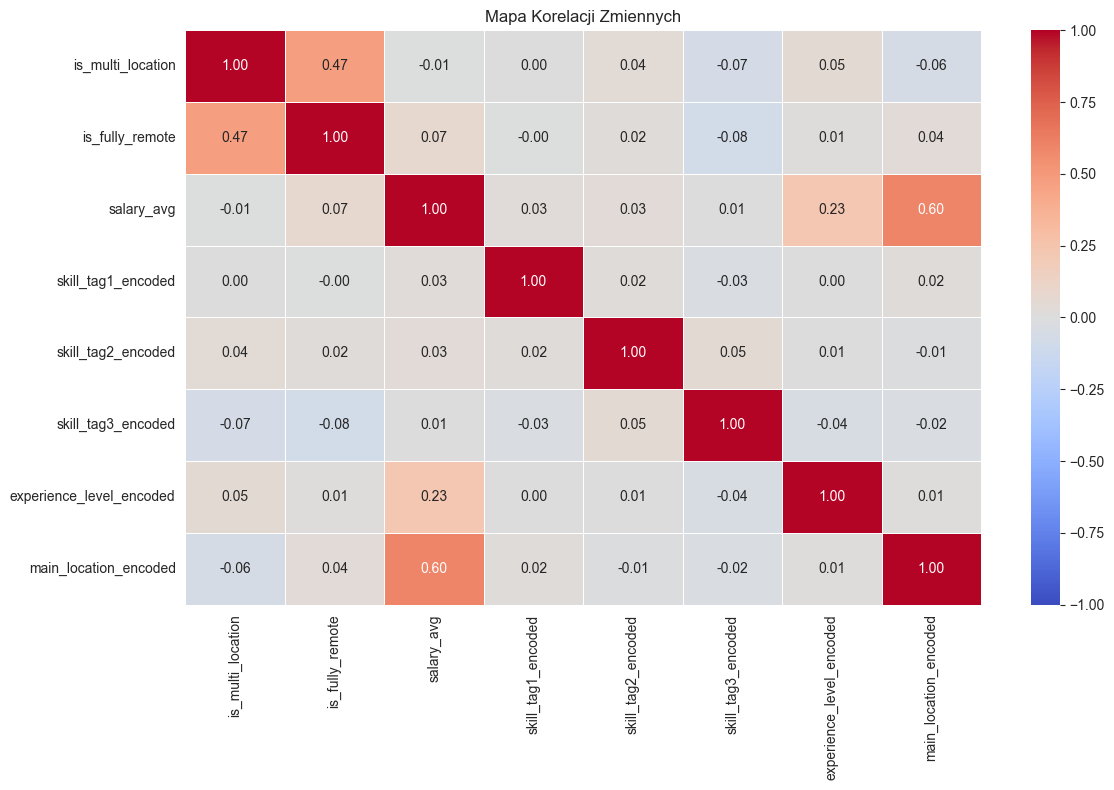

In [33]:
correlation_matrix = main.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa Korelacji Zmiennych')
plt.tight_layout()
plt.show()

Dobra korelacja wynagrodzenia z location! ;)

# Sekcja 3: Model Regresji Liniowej

In [51]:
X = main.drop(columns=['salary_avg'])
y = main['salary_avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja 
model = LinearRegression()

# Trenowanie modelu
model.fit(X_train_scaled, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Podsumowanie
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2: {r2}" )
print(f"MSE: {mse}" )
print(f'\tRMSE: {math.sqrt(mse)}')


R^2: 0.1746786715383989
MSE: 52475568.2981068
	RMSE: 7244.002229300237


# Sekcja 4: Podsumowanie

- R^2: Niezadowalające, model tłumaczy tylko 17% zmienności
    - 83% różnic wynika ze zmiennych nieujętych w modelu, mogą to być np:
        - Forma zatrudnienia (B2B vs UoP)
        - Wielkość firmy
        - Wymagany poziom wykształcenia
- MSE: Model mylił się średnio o 7244 PLN, co uważam za dużą wartość   
    - Możliwe, że Linear Regression po prostu nie nadaje się na takie dane, bo zaleznosci nie sa liniowe